In [48]:
import plotly.graph_objects as go
import pandas as pd

# NCBI BioProject

In [49]:
ncbi_bioproject_dict = {'PRJNA730823': {'title': 'Human Pangenome Reference Consortium',
                                        'type': 'Umbrella',
                                        'components':['PRJNA730822'],
                                        'umbrella-bioproject':'main'
                                        },
                        'PRJNA730822': {'title': 'HPRC Assembly',
                                        'type': 'Umbrella',
                                        'components': ['PRJNA727229'],
                                        'umbrella-bioproject':'PRJNA730823'
                                       },
                        'PRJNA727229' : {'title': 'Assembly of HG02257',
                                        'type': 'Umbrella',
                                         'components': ['PRJNA723016', 'PRJNA723017'],
                                         'umbrella-bioproject':'PRJNA730822'
                                        },
                        'PRJNA723016' : {'title': 'Homo sapiens alternate pseudohaplotype genome sequencing',
                                        'type': 'Genome Sequencing',
                                         'description': 'Assembly of HG02257 Paternal Haplotype',
                                         'assembly_level':'Contigs',
                                         'umbrella-bioproject':'PRJNA727229'
                                        },
                        'PRJNA723017' : {'title': 'Homo sapiens principal pseudohaplotype genome sequencing',
                                        'type': 'Genome Sequencing',
                                         'description': 'Assembly of HG02257 Maternal Haplotype',
                                         'assembly_level':'Scaffold',
                                         'umbrella-bioproject':'PRJNA727229'
                                        }
                        }
                       

In [50]:
pd.DataFrame.from_dict(ncbi_bioproject_dict, orient='index')

,title,type,components,umbrella-bioproject,description,assembly_level
PRJNA730823,Human Pangenome Reference Consortium,Umbrella,[PRJNA730822],main,NaN,NaN
PRJNA730822,HPRC Assembly,Umbrella,[PRJNA727229],PRJNA730823,NaN,NaN
PRJNA727229,Assembly of HG02257,Umbrella,"[PRJNA723016, PRJNA723017]",PRJNA730822,NaN,NaN
PRJNA723016,Homo sapiens alternate pseudohaplotype genome ...,Genome Sequencing,NaN,PRJNA727229,Assembly of HG02257 Paternal Haplotype,Contigs
PRJNA723017,Homo sapiens principal pseudohaplotype genome ...,Genome Sequencing,NaN,PRJNA727229,Assembly of HG02257 Maternal Haplotype,Scaffold


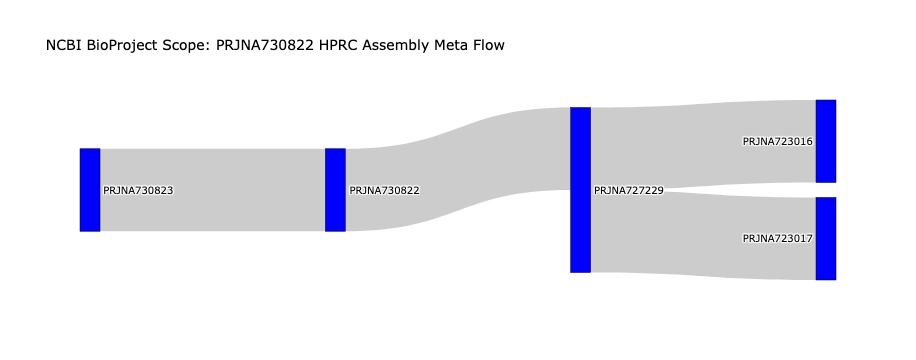

In [70]:
import plotly.graph_objects as go

# Create a dictionary to map node names to indices
node_indices = {node: idx for idx, node in enumerate(ncbi_bioproject_dict.keys())}

# Create links for the Sankey diagram
links = []
for key, val in ncbi_bioproject_dict.items():
    if 'components' in val:
        source = node_indices[key]
        for component in val['components']:
            target = node_indices[component]
            links.append({'source': source, 'target': target, 'value': 1})

# Create nodes for the Sankey diagram
nodes = [{'label': key} for key in ncbi_bioproject_dict.keys()]

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=[node['label'] for node in nodes],
        color="blue",  # Set node color to blue
        # font=dict(color="black")  # Set node label font color to black
    ),
    link=dict(
        source=[link['source'] for link in links],
        target=[link['target'] for link in links],
        value=[link['value'] for link in links]
    )
)])

# Update layout
fig.update_layout(
    title="NCBI BioProject Scope: PRJNA730822 HPRC Assembly Meta Flow",
    font=dict(size=10, color="black"),
    plot_bgcolor="black",
)

# Save the figure to an HTML file
fig.write_html("PRJNA730822-SankeyNetwork.html")
fig.show()